In [2]:
!pip install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.7/475.7 kB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.2 MB/s eta 0:00:00


In [14]:
import requests
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
url = "https://www.bbc.com/weather/293397"
response = requests.get(url)
if response.status_code == 200:
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
else:
    print("Failed to fetch the webpage.")

In [23]:
dates = [date.get_text() for date in soup.select('.wr-date__longish')]
high_temps = [high.get_text() for high in soup.select('.wr-day-temperature__high-value')]
low_temps = [low.get_text() for low in soup.select('.wr-day-temperature__low-value')]
weather_descriptions = [weather.get_text() for weather in soup.select('.wr-day__weather-type-description')]

In [26]:
print("Dates:", dates)
print("High Temps:", high_temps)
print("Low Temps:", low_temps)
print("Weather Descriptions:", weather_descriptions)

Dates: ['Thu\xa025th', 'Fri\xa026th', 'Sat\xa027th', 'Sun\xa028th', 'Mon\xa029th', 'Tue\xa030th', 'Wed\xa031st', 'Thu\xa01st', 'Fri\xa02nd', 'Sat\xa03rd', 'Sun\xa04th', 'Mon\xa05th', 'Tue\xa06th']
High Temps: ['31° 89°', '32° 90°', '31° 89°', '31° 89°', '32° 89°', '32° 90°', '32° 89°', '32° 89°', '32° 89°', '32° 89°', '32° 89°', '32° 89°', '32° 89°', '31° 89°']
Low Temps: ['24° 76°', '23° 74°', '25° 77°', '23° 73°', '24° 75°', '23° 74°', '23° 73°', '23° 73°', '23° 73°', '23° 73°', '23° 73°', '23° 73°', '23° 73°', '23° 73°']
Weather Descriptions: ['Sunny and a moderate breeze', 'Sunny and a moderate breeze', 'Sunny and a moderate breeze', 'Sunny and a gentle breeze', 'Sunny and a gentle breeze', 'Sunny and a gentle breeze', 'Sunny and a gentle breeze', 'Sunny and a gentle breeze', 'Sunny and a gentle breeze', 'Sunny and a gentle breeze', 'Sunny and a gentle breeze', 'Sunny and a gentle breeze', 'Sunny and a gentle breeze', 'Sunny and a gentle breeze']


In [28]:
min_length = min(len(dates), len(high_temps), len(low_temps), len(weather_descriptions))
dates = dates[:min_length]
high_temps = high_temps[:min_length]
low_temps = low_temps[:min_length]
weather_descriptions = weather_descriptions[:min_length]

In [33]:
weather_data = {
    'Date': dates,
    'High Temperature (C)': high_temps,
    'Low Temperature (C)': low_temps,
    'Weather': weather_descriptions
}

df = pd.DataFrame(weather_data)
df['High Temperature (C)'] = df['High Temperature (C)'].str.split('° ').str[0]
df['High Temperature (C)'] = pd.to_numeric(df['High Temperature (C)'].str.replace('°C', ''))
df['Low Temperature (C)'] = df['Low Temperature (C)'].str.split('° ').str[0]
df['Low Temperature (C)'] = pd.to_numeric(df['Low Temperature (C)'].str.replace('°C', ''))

print(df)

        Date  High Temperature (C)  Low Temperature (C)  \
0   Thu 25th                    31                   24   
1   Fri 26th                    32                   23   
2   Sat 27th                    31                   25   
3   Sun 28th                    31                   23   
4   Mon 29th                    32                   24   
5   Tue 30th                    32                   23   
6   Wed 31st                    32                   23   
7    Thu 1st                    32                   23   
8    Fri 2nd                    32                   23   
9    Sat 3rd                    32                   23   
10   Sun 4th                    32                   23   
11   Mon 5th                    32                   23   
12   Tue 6th                    32                   23   

                        Weather  
0   Sunny and a moderate breeze  
1   Sunny and a moderate breeze  
2   Sunny and a moderate breeze  
3     Sunny and a gentle breeze  
4  

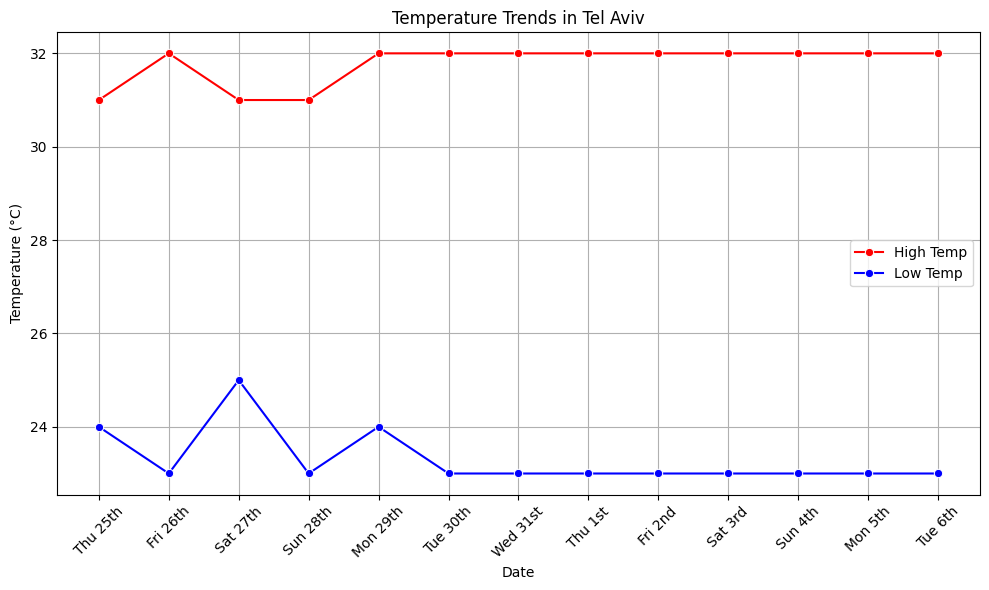

<ipython-input-35-87e7bcf1dd82>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Weather', data=df, palette='viridis')


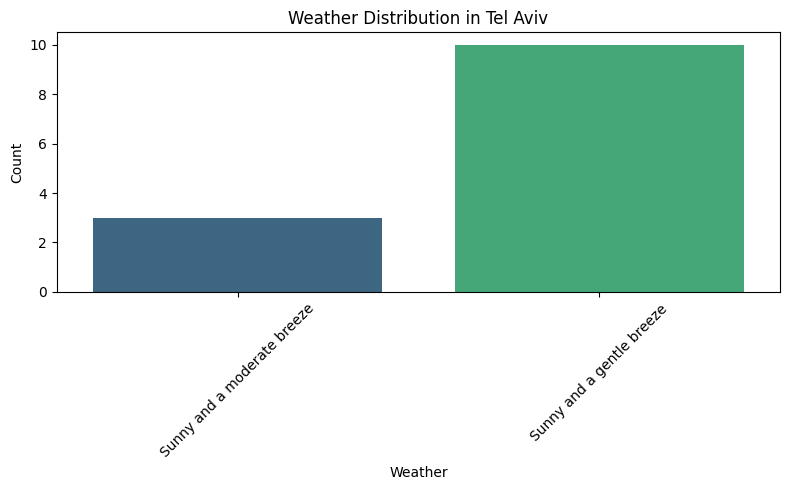

In [35]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='High Temperature (C)', data=df, marker='o', color='r', label='High Temp')
sns.lineplot(x='Date', y='Low Temperature (C)', data=df, marker='o', color='b', label='Low Temp')
plt.title('Temperature Trends in Tel Aviv')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='Weather', data=df, palette='viridis')
plt.title('Weather Distribution in Tel Aviv')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

As we can see the weather in Tel Aviv for the upcoming week (24 July- 31 July 2024) is a fairly hot week will gentle breezes.  
Something interesting to note is on Sat 27 July the high stay more or less the same but the low increases significantly while the follow day the low dips down but the high stays the same.

The methodology involved extracting weather data from the BBC Weather webpage using Python libraries. First, the HTML content of the page was retrieved using the requests library. Then, BeautifulSoup was used to parse the HTML and extract dates, high and low temperatures, and weather descriptions. These extracted data were organized into lists, trimmed to the same length, and converted into a Pandas DataFrame. The data was cleaned to ensure temperatures were in numeric format. Finally, Seaborn and Matplotlib were used to create visualizations, such as line plots for temperature trends and bar charts for weather distribution, to present the findings clearly.

For me the hardest thing was figuring out the columbs needed to be the same length and then writing to code to edit the data.